In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#import findspark
#findspark.init()
#import pyspark
#import random
#sc = pyspark.SparkContext()

df_clicks= pd.read_csv('clicks.csv'); 
df_events= pd.read_csv('events.csv',low_memory=False); 
df_installs= pd.read_csv('installs.csv'); 
df_auctions= pd.read_csv('auctions.csv'); 

In [94]:
df_installs.application_id.value_counts()

7     947
9     731
10    389
16    362
8     328
2     174
29     97
20     95
6      35
1      34
26     28
34     28
15     20
0      18
3      17
28     17
12     15
18     14
24     13
17     13
14     13
21      7
5       3
13      3
33      2
30      2
19      2
32      2
36      1
4       1
23      1
Name: application_id, dtype: int64

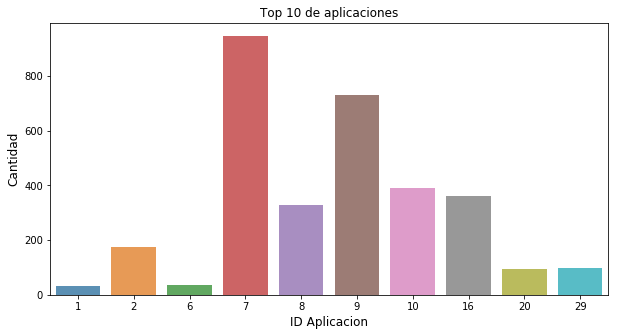

In [96]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
app_count  = df_installs['application_id'].value_counts(sort=True)
app_count = app_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(app_count.index, app_count.values, alpha=0.8)
plt.title('Top 10 de aplicaciones')
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('ID Aplicacion', fontsize=12)
plt.show()

In [37]:
df_events.date = pd.to_datetime(df_events.date)

In [27]:
df_eventos_por_dia = df_events.date\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

In [28]:
df_eventos_por_dia

,dia,cantidad
8,2019-03-05,240549
7,2019-03-06,253505
6,2019-03-07,253706
4,2019-03-08,285535
3,2019-03-09,286221
2,2019-03-10,293091
5,2019-03-11,268884
1,2019-03-12,296665
0,2019-03-13,316267


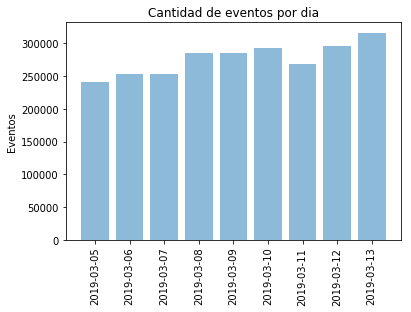

In [196]:
plt.bar(np.arange(len(df_eventos_por_dia)), df_eventos_por_dia.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_eventos_por_dia)), df_eventos_por_dia.dia.dt.date,rotation=90)
plt.ylabel('Eventos')
plt.title('Cantidad de eventos por dia')
 
plt.show()

In [125]:
df_installs.created = pd.to_datetime(df_installs.created)
df_installs['hour'] = df_installs.created.dt.hour
df_installs['hour'] = df_installs['hour'].replace(0,24)

In [126]:
df_installs_por_dia = df_installs.created\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

In [127]:
df_installs_por_dia


,dia,cantidad
7,2019-03-05,337
8,2019-03-06,325
2,2019-03-07,393
5,2019-03-08,366
4,2019-03-09,368
6,2019-03-10,351
3,2019-03-11,377
0,2019-03-12,472
1,2019-03-13,423


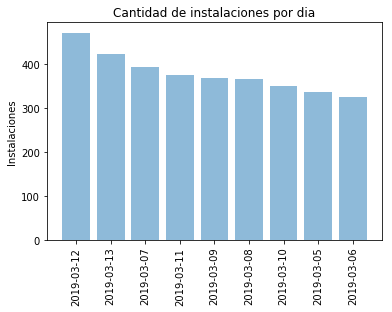

In [195]:
plt.bar(np.arange(len(df_installs_por_dia)), df_installs_por_dia.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_installs_por_dia)), df_installs_por_dia.dia.dt.date,rotation=90)
plt.ylabel('Instalaciones')
plt.title('Cantidad de instalaciones por dia')
 
plt.show()

In [128]:
df_installs_por_hora = df_installs.hour\
       .value_counts()\
       .rename_axis('hora')\
       .reset_index(name='cantidad')\
       .sort_values(by='hora', ascending=True)

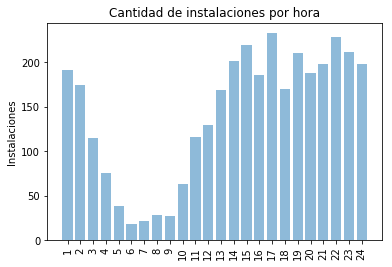

In [129]:
plt.bar(np.arange(len(df_installs_por_hora)), df_installs_por_hora.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_installs_por_hora)), df_installs_por_hora.hora,rotation=90)
plt.ylabel('Instalaciones')
plt.title('Cantidad de instalaciones por hora')
 
plt.show()

In [131]:
df_clicks.created = pd.to_datetime(df_clicks.created)

In [177]:
df_clicks_por_dia = df_clicks.created\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

In [178]:
df_clicks_por_dia

,dia,cantidad
7,2019-03-05 00:00:00+00:00,31
8,2019-03-06 00:00:00+00:00,14
5,2019-03-07 00:00:00+00:00,2989
6,2019-03-08 00:00:00+00:00,2839
4,2019-03-09 00:00:00+00:00,3283
2,2019-03-10 00:00:00+00:00,3966
1,2019-03-11 00:00:00+00:00,4557
0,2019-03-12 00:00:00+00:00,5204
3,2019-03-13 00:00:00+00:00,3468


In [138]:
df_auctions.date = pd.to_datetime(df_auctions.date)

In [180]:
df_auctions_por_dia = df_auctions.date\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

In [181]:
df_auctions_por_dia

,dia,cantidad
7,2019-03-05,1182401
8,2019-03-06,1032970
6,2019-03-07,2047661
4,2019-03-08,2303002
5,2019-03-09,2074552
2,2019-03-10,2637534
3,2019-03-11,2574916
1,2019-03-12,2779910
0,2019-03-13,2938373


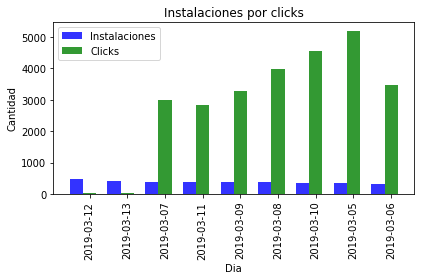

In [194]:
n_groups = 9
eventos = df_eventos_por_dia.cantidad
clicks = df_clicks_por_dia.cantidad
instalaciones = df_installs_por_dia.cantidad
subastas = df_auctions_por_dia.cantidad
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, instalaciones, bar_width,
alpha=opacity,
color='b',
label='Instalaciones')
 
rects2 = plt.bar(index + bar_width, clicks, bar_width,
alpha=opacity,
color='g',
label='Clicks')
 
plt.xlabel('Dia')
plt.ylabel('Cantidad')
plt.title('Instalaciones por clicks')
plt.xticks(index + bar_width, df_installs_por_dia.dia.dt.date,rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

In [9]:
#Eventos que son instalaciones 42474 (1,7%)

df_events["ref_hash"].isin(df_installs["ref_hash"]).value_counts()

False    2451949
True       42474
Name: ref_hash, dtype: int64

In [11]:
#Eventos que son subastas 1047126 (41,9%)

df_events["ref_hash"].isin(df_auctions["device_id"]).value_counts()

False    1447297
True     1047126
Name: ref_hash, dtype: int64

In [15]:
#Subastas que terminan en clicks 5302392 (27,1%)

df_auctions["device_id"].isin(df_clicks["ref_hash"]).value_counts()

False    14268927
True      5302392
Name: device_id, dtype: int64

In [16]:
#Subastas que terminan en instalaciones 59416 (0,3%)

df_auctions["device_id"].isin(df_installs["ref_hash"]).value_counts()

False    19511903
True        59416
Name: device_id, dtype: int64

In [18]:
#Clicks que terminan en instalaciones 11 (0,04%)

df_clicks["ref_hash"].isin(df_installs["ref_hash"]).value_counts()

False    26340
True        11
Name: ref_hash, dtype: int64

In [144]:
df_clicks.wifi_connection.value_counts()

False    26351
Name: wifi_connection, dtype: int64

In [145]:
df_installs.wifi.value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [149]:
df_auctions.platform.value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [169]:
auctions_to_installs= df_auctions[df_auctions.device_id.isin(df_installs["ref_hash"])]
auctions_to_installs['datePart'] = auctions_to_installs.date.dt.floor('d')
auctions_to_installs_per_day = auctions_to_installs.datePart.value_counts().rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

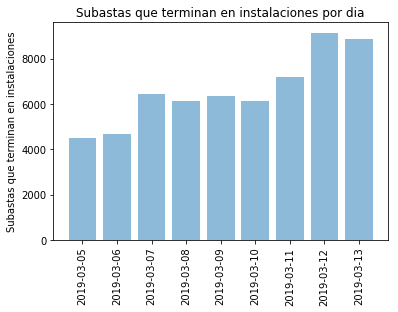

In [192]:
plt.bar(np.arange(len(auctions_to_installs_per_day)), auctions_to_installs_per_day.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(auctions_to_installs_per_day)), auctions_to_installs_per_day.dia.dt.date,rotation=90)
plt.ylabel('Subastas que terminan en instalaciones')
plt.title('Subastas que terminan en instalaciones por dia')
 
plt.show()

In [188]:
auctions_to_clicks = df_auctions[df_auctions.device_id.isin(df_clicks["ref_hash"])]
auctions_to_clicks['datePart'] = auctions_to_clicks.date.dt.floor('d')
auctions_to_clicks_per_day = auctions_to_clicks.datePart.value_counts().rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


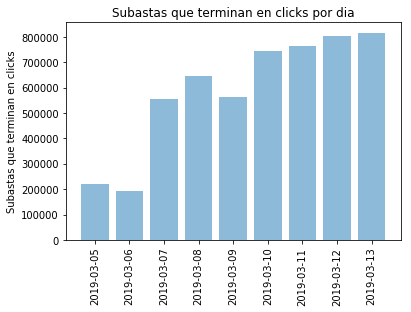

In [193]:
plt.bar(np.arange(len(auctions_to_clicks_per_day)), auctions_to_clicks_per_day.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(auctions_to_clicks_per_day)), auctions_to_clicks_per_day.dia.dt.date,rotation=90)
plt.ylabel('Subastas que terminan en clicks')
plt.title('Subastas que terminan en clicks por dia')
 
plt.show()

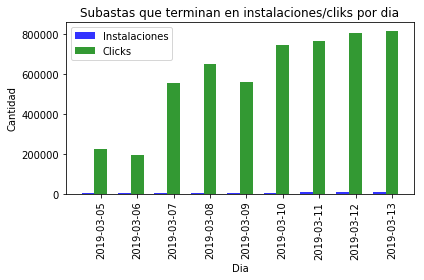

In [191]:
n_groups = 9
clicks = auctions_to_clicks_per_day.cantidad
instalaciones = auctions_to_installs_per_day.cantidad
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, instalaciones, bar_width,
alpha=opacity,
color='b',
label='Instalaciones')
 
rects2 = plt.bar(index + bar_width, clicks, bar_width,
alpha=opacity,
color='g',
label='Clicks')
 
plt.xlabel('Dia')
plt.ylabel('Cantidad')
plt.title('Subastas que terminan en instalaciones/cliks por dia')
plt.xticks(index + bar_width, auctions_to_installs_per_day.dia.dt.date,rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()